# Libraries import

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import xg

In [140]:
import sys
print("Python version:", sys.version)

Python version: 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]


# Load dataset

In [208]:
df = pd.read_csv(r'/Users/patry/Desktop/Predict Hair Fall.csv')

In [209]:
df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


# Data exploration

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [211]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


There are missing data in df in form of "No Data" 

### Check for missing values

In [212]:
df.isna().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

### check for duplicates

In [213]:
df.duplicated().sum()

0

#### There are no missing values and duplicates

In [214]:
# Drop ID column
df = df.drop("Id", axis =1)

In [215]:
df = df.replace("No Data", "Unknown")


In [216]:
df["Hair Loss"] = df["Hair Loss"].map({0: False, 1:True})

# EDA

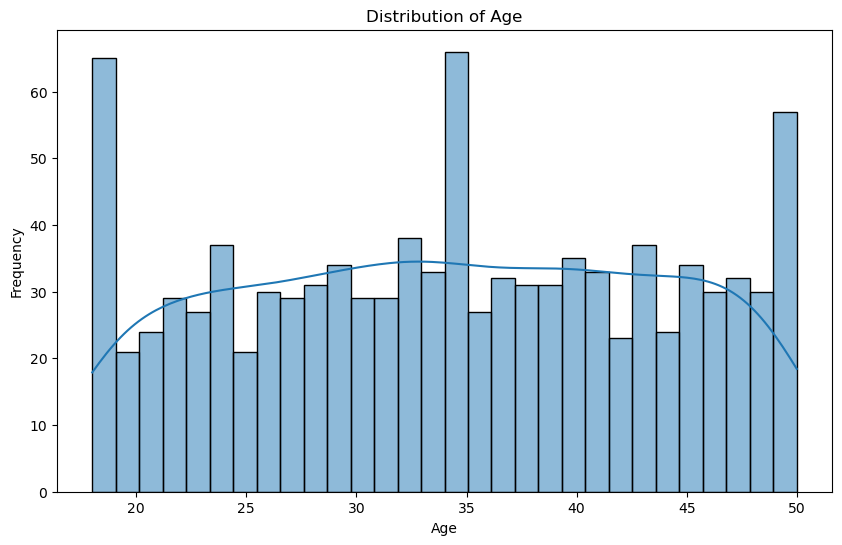

In [217]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


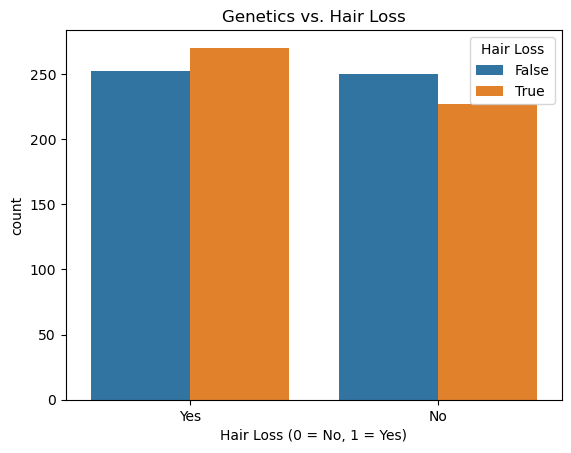

In [218]:
sns.countplot(x='Genetics', hue='Hair Loss', data=df)
plt.title('Genetics vs. Hair Loss')
plt.xlabel('Hair Loss (0 = No, 1 = Yes)')
plt.show()


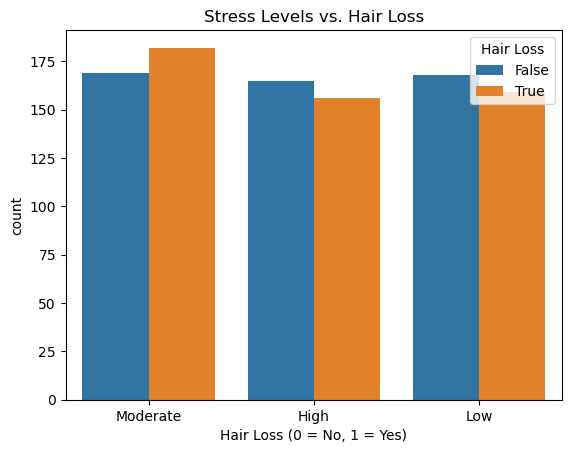

In [219]:
sns.countplot(x='Stress', hue='Hair Loss', data=df)
plt.title('Stress Levels vs. Hair Loss')
plt.show()


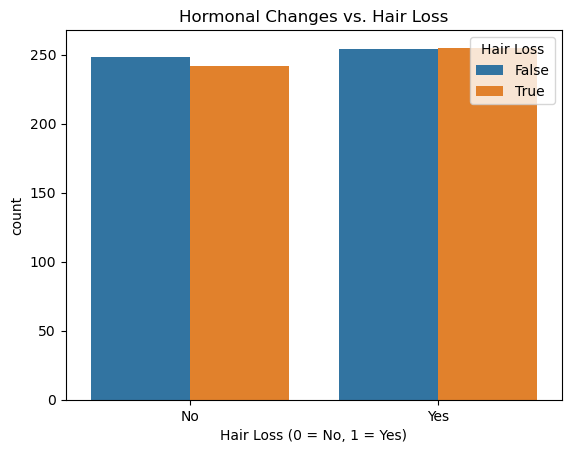

In [220]:
sns.countplot(x='Hormonal Changes', hue='Hair Loss', data=df)
plt.title('Hormonal Changes vs. Hair Loss')
plt.show()


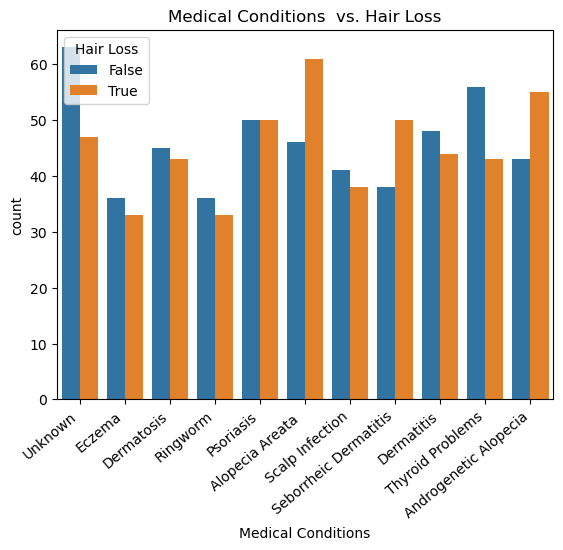

In [221]:
ax= sns.countplot(x='Medical Conditions', hue='Hair Loss', data=df, orient= "y")
plt.title('Medical Conditions  vs. Hair Loss')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

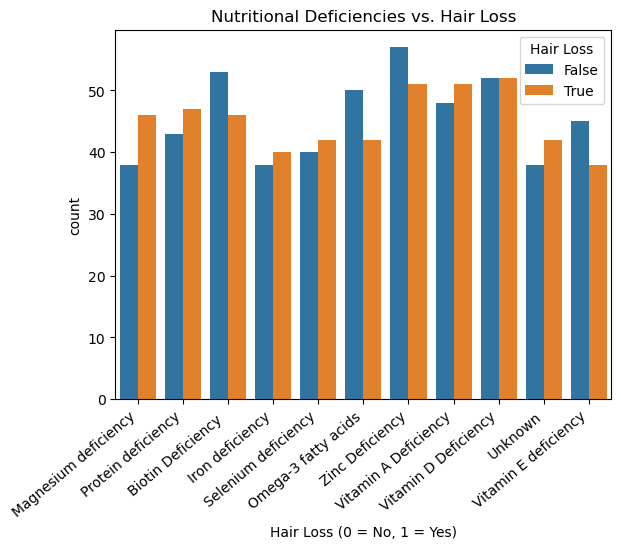

In [222]:
ax = sns.countplot(x='Nutritional Deficiencies ', hue='Hair Loss', data=df)
plt.title('Nutritional Deficiencies vs. Hair Loss')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.show()


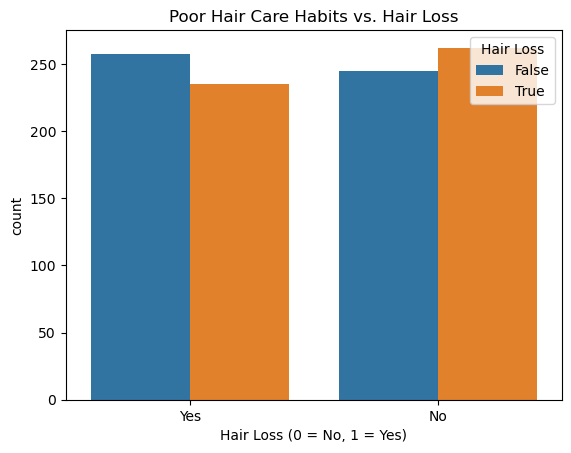

In [223]:
ax = sns.countplot(x='Poor Hair Care Habits ', hue='Hair Loss', data=df)
plt.title('Poor Hair Care Habits vs. Hair Loss')
plt.show()


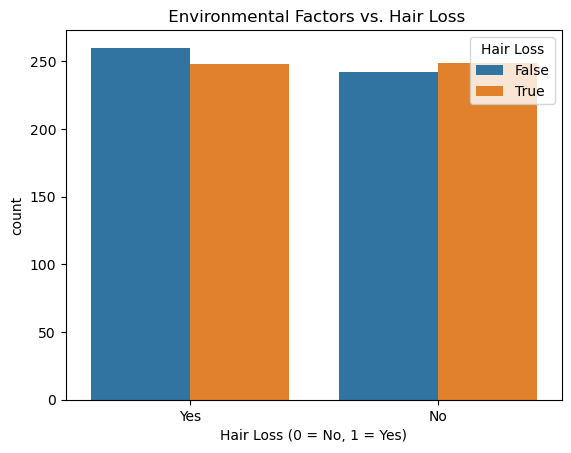

In [224]:
ax = sns.countplot(x='Environmental Factors', hue='Hair Loss', data=df)
plt.title(' Environmental Factors vs. Hair Loss')
plt.show()


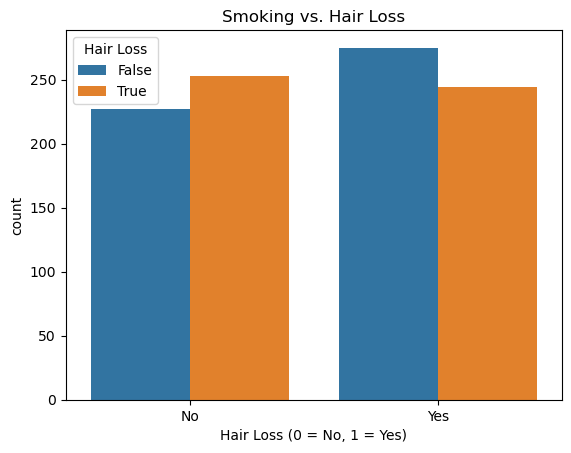

In [225]:
ax = sns.countplot(x='Smoking', hue='Hair Loss', data=df)
plt.title('Smoking vs. Hair Loss')
plt.show()


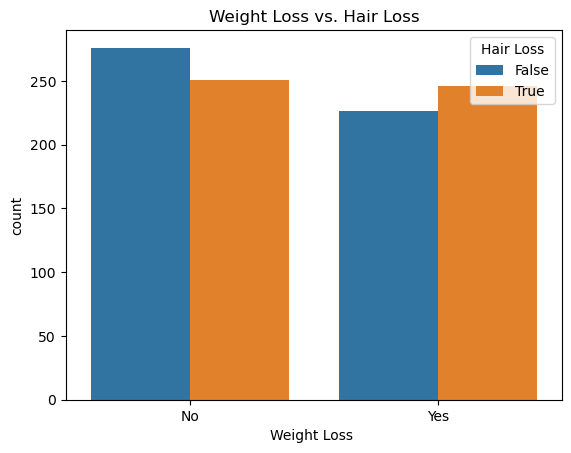

In [227]:
ax = sns.countplot(x='Weight Loss ', hue='Hair Loss', data=df)
plt.title('Weight Loss vs. Hair Loss')
plt.show()

ValueError: could not convert string to float: 'Yes'

 # Feature Engeneering

In [234]:
label_encoder = LabelEncoder()
encoded_df = df.copy()
columns_to_encode = ["Genetics", "Hormonal Changes", "Medical Conditions", "Medications & Treatments", "Nutritional Deficiencies ", "Stress", "Poor Hair Care Habits ", "Environmental Factors", "Smoking", "Weight Loss ", "Hair Loss"]

for column in columns_to_encode:
    encoded_df[column] = label_encoder.fit_transform(df[column])

scaler = StandardScaler()
encoded_df["Age"] = scaler.fit_transform(df[["Age"]])

In [235]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [236]:
encoded_df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,0,10,10,2,2,-1.620370,1,1,0,0,0
1,0,0,4,1,2,0,0.940099,1,1,0,0,0
2,0,0,3,3,4,2,-0.873567,1,1,0,1,0
3,1,1,6,1,0,2,1.260157,1,1,0,0,0
4,0,0,5,0,1,2,-0.446822,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,8,8,7,1,-0.126763,1,1,1,1,1
995,1,1,10,0,4,1,1.366843,0,0,0,1,0
996,0,1,1,2,4,2,-1.513684,1,0,1,1,1
997,0,1,2,7,0,2,-0.233449,1,1,1,1,1


In [79]:
X = droped_df.drop("Hair Loss", axis = 1)
y = droped_df["Hair Loss"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
droped_df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Genetics                   999 non-null    int64
 1   Hormonal Changes           999 non-null    int64
 2   Medical Conditions         999 non-null    int64
 3   Medications & Treatments   999 non-null    int64
 4   Nutritional Deficiencies   999 non-null    int64
 5   Stress                     999 non-null    int64
 6   Age                        999 non-null    int64
 7   Poor Hair Care Habits      999 non-null    int64
 8   Environmental Factors      999 non-null    int64
 9   Smoking                    999 non-null    int64
 10  Weight Loss                999 non-null    int64
 11  Hair Loss                  999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


<Axes: >

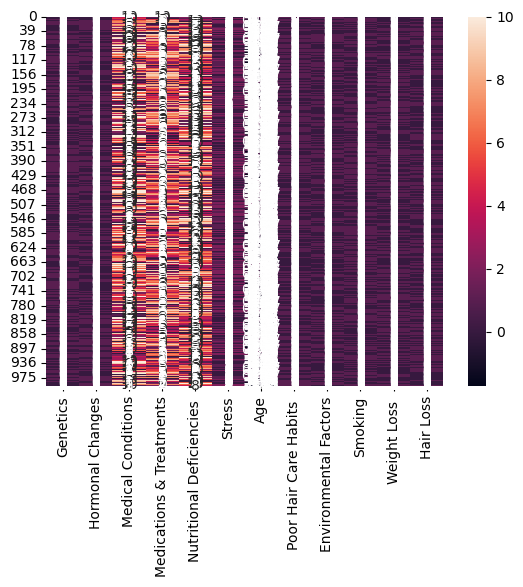

In [255]:
sns.heatmap(encoded_df, annot = True)

In [258]:
from sklearn.decomposition import PCA

# Dummy encoding for categorical variables
df_encoded2 = pd.get_dummies(df, drop_first=True)

# Standardizing the features
features = StandardScaler().fit_transform(df_encoded2)

# Applying PCA
pca = PCA(n_components=5)  # for example, reduce to 2 components
principal_components = pca.fit_transform(features)


# The resulting 'principal_components' can be used in further analysis or plotting.encoded_df)

In [81]:
#Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'ROC-AUC: {roc_auc_score(y_test, predictions)}')


Accuracy: 0.515
ROC-AUC: 0.5329992914262577


In [82]:
from sklearn.model_selection import GridSearchCV

# Example: Grid Search with Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [246]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [249]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [250]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [251]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.588


In [252]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:0.48145	validation-rmse:0.50483
[1]	train-rmse:0.45420	validation-rmse:0.50198
[2]	train-rmse:0.42515	validation-rmse:0.50081
[3]	train-rmse:0.41035	validation-rmse:0.50173
[4]	train-rmse:0.39258	validation-rmse:0.51055
[5]	train-rmse:0.38465	validation-rmse:0.51222
[6]	train-rmse:0.36485	validation-rmse:0.51656
[7]	train-rmse:0.34657	validation-rmse:0.52113
[8]	train-rmse:0.33508	validation-rmse:0.52621
[9]	train-rmse:0.32745	validation-rmse:0.52682
[10]	train-rmse:0.31961	validation-rmse:0.53192
[11]	train-rmse:0.30546	validation-rmse:0.53604
[12]	train-rmse:0.29640	validation-rmse:0.54194
[13]	train-rmse:0.28516	validation-rmse:0.54309
[14]	train-rmse:0.27548	validation-rmse:0.54438
[15]	train-rmse:0.26617	validation-rmse:0.54544
[16]	train-rmse:0.25429	validation-rmse:0.54567
[17]	train-rmse:0.24688	validation-rmse:0.54682
[18]	train-rmse:0.24216	validation-rmse:0.54572
[19]	train-rmse:0.23559	validation-rmse:0.54879
[20]	train-rmse:0.22548	validation-rmse:0.55140
[2